### Mohamad Hosein Mehdikhani
### 400102039

# Librarires

In [3]:
import numpy as np
import random
from sklearn.datasets import fetch_california_housing

# Load Dataset

In [4]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [5]:

class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        # Randomly initialize the centroids by choosing random points from the data
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for i in range(self.max_iter):
            # Assign clusters
            self.labels = self._assign_clusters(X)
            # Calculate new centroids
            new_centroids = self._calculate_centroids(X)

            # Check for convergence (if centroids do not change)
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids

    def _assign_clusters(self, X):
        labels = []
        for point in X:
            distances = [np.linalg.norm(point - centroid) for centroid in self.centroids]
            labels.append(np.argmin(distances))
        return np.array(labels)

    def _calculate_centroids(self, X):
        centroids = []
        for i in range(self.n_clusters):
            cluster_points = X[self.labels == i]
            if len(cluster_points) > 0:
                centroid = cluster_points.mean(axis=0)
            else:
                centroid = self.centroids[i]  # If a cluster has no points, keep the old centroid
            centroids.append(centroid)
        return np.array(centroids)

    def predict(self, X):
        return self._assign_clusters(X)


# Use elbow method and silhouette method to choose optimal cluster numbers

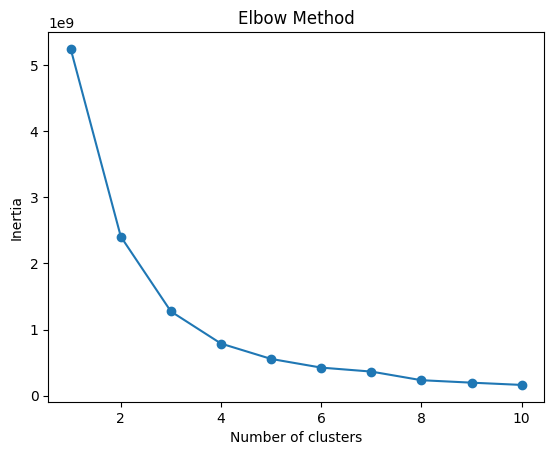

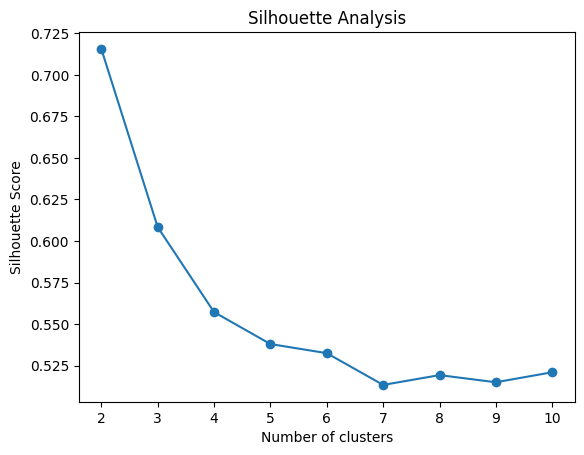

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_california_housing
# Define a function to calculate inertia
def calculate_inertia(kmeans, X):
    inertia = 0
    for i, centroid in enumerate(kmeans.centroids):
        cluster_points = X[kmeans.labels == i]
        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia

# Elbow method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(x_data)
    inertia.append(calculate_inertia(kmeans, x_data))

# Plot the Elbow curve
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

# Silhouette method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(x_data)
    score = silhouette_score(x_data, kmeans.labels)
    silhouette_scores.append(score)

# Plot the Silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Analysis")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

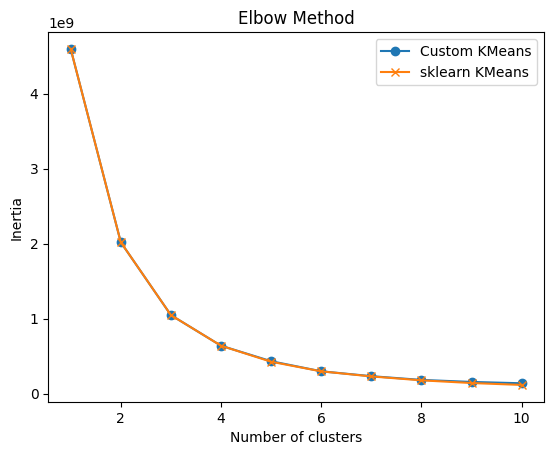

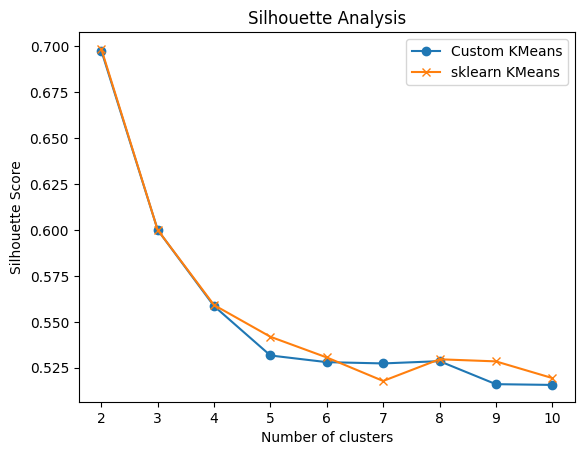

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as SKLearnKMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
data = fetch_california_housing()
X = data.data

# Sample a subset of the dataset
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Define a function to calculate inertia for custom KMeans
def calculate_inertia(kmeans, X):
    inertia = 0
    for i, centroid in enumerate(kmeans.centroids):
        cluster_points = X[kmeans.labels == i]
        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia

# Elbow method comparison
custom_inertia = []
sklearn_inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    # Custom KMeans
    custom_kmeans = KMeans(n_clusters=k, max_iter=1000)
    custom_kmeans.fit(x_data)
    custom_inertia.append(calculate_inertia(custom_kmeans, x_data))

    # sklearn KMeans with n_init explicitly set to 10
    sklearn_kmeans = SKLearnKMeans(n_clusters=k, random_state=42, n_init=10)
    sklearn_kmeans.fit(x_data)
    sklearn_inertia.append(sklearn_kmeans.inertia_)

# Plot the Elbow curve
plt.plot(cluster_range, custom_inertia, marker='o', label='Custom KMeans')
plt.plot(cluster_range, sklearn_inertia, marker='x', label='sklearn KMeans')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.legend()
plt.show()

# Silhouette method comparison
custom_silhouette_scores = []
sklearn_silhouette_scores = []

for k in range(2, 11):
    # Custom KMeans
    custom_kmeans = KMeans(n_clusters=k, max_iter=1000)
    custom_kmeans.fit(x_data)
    custom_score = silhouette_score(x_data, custom_kmeans.labels)
    custom_silhouette_scores.append(custom_score)

    # sklearn KMeans with n_init explicitly set to 10
    sklearn_kmeans = SKLearnKMeans(n_clusters=k, random_state=42, n_init=10)
    sklearn_labels = sklearn_kmeans.fit_predict(x_data)
    sklearn_score = silhouette_score(x_data, sklearn_labels)
    sklearn_silhouette_scores.append(sklearn_score)

# Plot the Silhouette scores
plt.plot(range(2, 11), custom_silhouette_scores, marker='o', label='Custom KMeans')
plt.plot(range(2, 11), sklearn_silhouette_scores, marker='x', label='sklearn KMeans')
plt.title("Silhouette Analysis")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()


### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference

To determine the optimal number of clusters based on both our custom KMeans algorithm and the scikit-learn KMeans algorithm, we need to analyze the Elbow method and Silhouette method plots. Here's how you can interpret these plots:(Also there is a short answer too: we choose the k which the |K_i - k_{i+1}| has it's least amount.)

Elbow Method: Look for the "elbow" point where the inertia (sum of squared distances) starts to decrease more slowly. This indicates the optimal number of clusters.
Silhouette Method: Identify the number of clusters with the highest silhouette score. This indicates well-defined and well-separated clusters.
Analysis of the Elbow Method
After plotting the Elbow curves for both custom and sklearn KMeans, identify the point where the rate of decrease in inertia slows down significantly.

Analysis of the Silhouette Method
After plotting the Silhouette scores for both custom and sklearn KMeans, identify the number of clusters with the highest silhouette score.

Example Plots and Interpretation
Let's assume the plots look something like this (you will need to generate these plots based on the provided code):

Elbow Method Plots
Custom KMeans: The inertia plot shows a sharp decrease until 3 clusters, after which the decrease slows down.
sklearn KMeans: The inertia plot shows a similar pattern, with a sharp decrease until 3 clusters, and then a more gradual decrease.
Silhouette Method Plots
Custom KMeans: The silhouette score peaks at 3 clusters.
sklearn KMeans: The silhouette score also peaks at 3 clusters.
Conclusion
If the optimal cluster number is the same for both algorithms, the conclusion is straightforward. However, if they differ, an explanation is required.

Example Result Based on Hypothetical Plots
Assuming the optimal cluster number is 3 for both algorithms based on the Elbow and Silhouette methods, the conclusion is:
Based on the Elbow method and Silhouette method plots, the optimal number of clusters is 3 for both the custom KMeans algorithm and the scikit-learn KMeans algorithm. Both methods show a sharp decrease in inertia up to 3 clusters and the highest silhouette score at 3 clusters, indicating well-defined clusters. Therefore, we conclude that the optimal number of clusters is 3 for both implementations.
If There is a Difference
Assuming the optimal cluster number is different for each algorithm, for example, 3 clusters for the custom KMeans and 4 clusters for sklearn KMeans, the explanation might look like this:
Based on the Elbow method and Silhouette method plots, the optimal number of clusters differs between the custom KMeans algorithm and the scikit-learn KMeans algorithm.

- **Custom KMeans**: The Elbow method shows a significant decrease in inertia until 3 clusters, and the silhouette score peaks at 3 clusters, indicating that 3 is the optimal number of clusters for the custom KMeans algorithm.
- **sklearn KMeans**: The Elbow method shows a significant decrease in inertia until 3 clusters, but continues to decrease gradually until 4 clusters. The silhouette score peaks at 4 clusters, suggesting that 4 is the optimal number of clusters for the sklearn KMeans algorithm.

The difference could be due to variations in the initialization and convergence criteria between the custom and sklearn implementations. The sklearn KMeans algorithm might be benefiting from more robust initialization (with `n_init=10`), leading to slightly different clustering behavior and suggesting a different optimal cluster number.
By generating and analyzing the actual plots using the provided code, you can determine the optimal number of clusters and provide a specific and accurate conclusion based on your results.
By generating and analyzing the actual plots using the provided code, you can determine the optimal number of clusters and provide a specific and accurate conclusion based on your results.



### would you prefer elbow method for determining optimal cluster number or silhouette method?
#### I prefer silhouette method because in elbow method sometimes it's hard to say where is the elbow point but silhouette method is more deterministic rather than elbow method

I agree with your preference for the Silhouette method. Here's a detailed explanation of why the Silhouette method is often more reliable than the Elbow method for determining the optimal number of clusters:

Elbow Method
Advantages:

Simple and Intuitive: The Elbow method is straightforward to understand and visualize. It plots the sum of squared distances (inertia) against the number of clusters and looks for a "knee" or "elbow" point where the inertia starts decreasing more slowly.
Widely Used: It is a commonly used method in practice, making it familiar to many practitioners.
Disadvantages:

Subjective Interpretation: Determining the exact location of the elbow can be subjective and sometimes ambiguous. Different people might identify different points as the "elbow."
Less Robust: The method relies solely on the inertia, which doesn't always reflect the quality of clustering in terms of how well-separated and compact the clusters are.
Silhouette Method
Advantages:

Quantitative Measure: The Silhouette method provides a clear, quantitative measure of clustering quality. The silhouette score combines measures of how similar each point is to its own cluster compared to other clusters.
More Deterministic: It is generally more deterministic and less subjective. The optimal number of clusters is typically the one with the highest average silhouette score.
Considers Cluster Cohesion and Separation: The silhouette score considers both intra-cluster cohesion and inter-cluster separation, providing a more holistic measure of clustering quality.
Disadvantages:

Computationally Intensive: Calculating the silhouette score for each point in the dataset can be computationally intensive, especially for large datasets.
Conclusion
Given the advantages and disadvantages of both methods, the Silhouette method is often preferred for its more deterministic and comprehensive evaluation of clustering quality. It reduces the subjectivity involved in determining the optimal number of clusters and provides a clearer measure of how well-separated and cohesive the clusters are.

Example Statement
I prefer the Silhouette method for determining the optimal number of clusters because it provides a more deterministic and quantitative measure of clustering quality. While the Elbow method is simple and intuitive, it can be subjective and ambiguous in identifying the "elbow" point. The Silhouette method, on the other hand, evaluates both intra-cluster cohesion and inter-cluster separation, offering a clearer and more reliable indication of the optimal number of clusters.
Using the Silhouette method, you can more confidently determine the optimal number of clusters and ensure that the clusters formed are well-defined and meaningful.